In [28]:
import matplotlib.pyplot as plt
#make pretty comments
from IPython.display import Latex 
#in case we want interactivity
from IPython.html.widgets import interactive 
#Make plots show up in notebook
%pylab inline --no-import-all 

Populating the interactive namespace from numpy and matplotlib


/Users/schultzk/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [59]:
import scipy as sp
from scipy import optimize


In [60]:
sp.misc

<module 'scipy.misc' from '/Users/schultzk/anaconda/lib/python2.7/site-packages/scipy/misc/__init__.pyc'>

In [47]:
h = 1
h_ = h/(2*pi)
e = 1.602e-19
cf = 1          # if cf = h_, use units where h_ = 1

a = 1          # minimum distance
U0 = 2 * pi  # potential depth
          

args = {'min_d': a, 'depth': U0}



x_min = 0.01
x_max =  50
N = 750 

In [48]:

def U_LJ(x, args):
    """
   Lennard Jones potential
    """
    
    a = args['min_d']
    U0     = args['depth']
    
    
    u = U0 * ((a/x)**12-2*(a/x)**6)

    return u

In [49]:
x = linspace(x_min, x_max, N)
x

array([  1.00000000e-02,   7.67423231e-02,   1.43484646e-01,
         2.10226969e-01,   2.76969292e-01,   3.43711615e-01,
         4.10453939e-01,   4.77196262e-01,   5.43938585e-01,
         6.10680908e-01,   6.77423231e-01,   7.44165554e-01,
         8.10907877e-01,   8.77650200e-01,   9.44392523e-01,
         1.01113485e+00,   1.07787717e+00,   1.14461949e+00,
         1.21136182e+00,   1.27810414e+00,   1.34484646e+00,
         1.41158879e+00,   1.47833111e+00,   1.54507343e+00,
         1.61181575e+00,   1.67855808e+00,   1.74530040e+00,
         1.81204272e+00,   1.87878505e+00,   1.94552737e+00,
         2.01226969e+00,   2.07901202e+00,   2.14575434e+00,
         2.21249666e+00,   2.27923899e+00,   2.34598131e+00,
         2.41272363e+00,   2.47946595e+00,   2.54620828e+00,
         2.61295060e+00,   2.67969292e+00,   2.74643525e+00,
         2.81317757e+00,   2.87991989e+00,   2.94666222e+00,
         3.01340454e+00,   3.08014686e+00,   3.14688919e+00,
         3.21363151e+00,

In [63]:
U = U_LJ(x, args);
f=lambda x: U_LJ(x,args)
d=sp.misc.derivative(f,x)
x_opt_min = optimize.fmin(U_LJ, [0.1], (args,))

Optimization terminated successfully.
         Current function value: -6.283185
         Iterations: 21
         Function evaluations: 42


Optimization terminated successfully.
         Current function value: -13.000000
         Iterations: 28
         Function evaluations: 56
[ 16.]


/Users/schultzk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/Users/schultzk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract


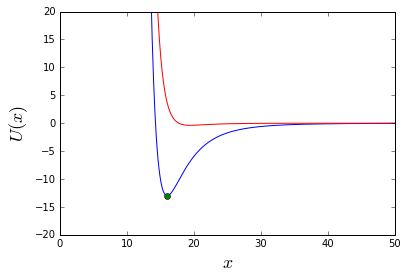

In [67]:
def fit_guess(a=1,U0=10):
    
    args = {'min_d': a, 'depth': U0}
    U = U_LJ(x, args);
    f=lambda x: U_LJ(x,args)
    diff=sp.misc.derivative(f,x,dx=.01,n=2)
    x_opt_min = optimize.fmin(U_LJ, [0.1], (args,))
    print x_opt_min
    fig, ax = subplots()
   
    ax.plot(x, U)
    ax.plot(x_opt_min, U_LJ(x_opt_min, args), 'o')
    ax.plot(x,diff)
    ax.set_ylim(-20, 20)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$U(x)$', fontsize=18);

w=interactive(fit_guess,a=(0.,50.,1), U0=(0,20.,1))
display(w)



NameError: name 'assemble_u_potential' is not defined

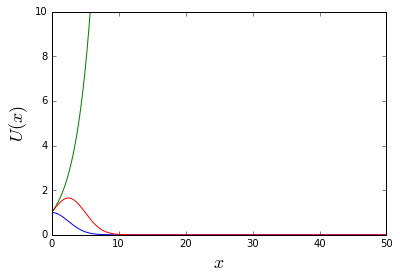

In [102]:
fig, ax = subplots()
   
ax.plot(x, exp(-2*((x)/5)**2))
ax.plot(x,exp(2*x/5))
ax.plot(x,exp(-2*((x)/5)**2)*exp(2*x/5))
ax.set_ylim(-0, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

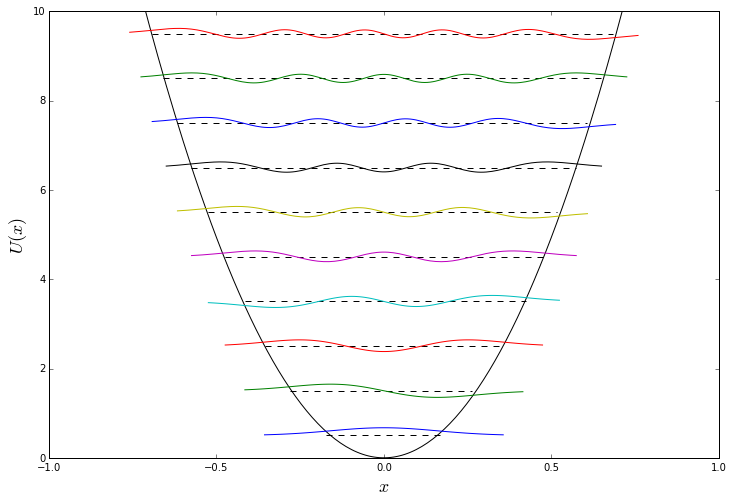

In [24]:
fig, ax = subplots(figsize=(12,8))

ax.plot(x, U, 'k')
for n in range(10):
    Y = evals[n] + evecs[n]

    mask = where(Y > U)    
    ax.plot(x[mask], evals[n].real * ones(shape(x))[mask], 'k--')

    mask = where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real)
    
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [14]:
inner_prod = zeros((len(boundidx), len(boundidx))).astype(np.complex)
expect_pos = zeros((len(boundidx), len(boundidx))).astype(np.complex)
expect_kin = zeros((len(boundidx), len(boundidx))).astype(np.complex)

for i, l in enumerate(boundidx):
    for j, k in enumerate(boundidx):
    
        psi_l = wavefunction_normalize(x, evecs[l])
        psi_k = wavefunction_normalize(x, evecs[k])
    
        inner_prod[i,j] = inner_product(x, psi_l, psi_k)                 # <psi_l|psi_k>
        expect_pos[i,j] = inner_product(x, psi_l, x * psi_k)             # <psi_l|x|psi_k>
        expect_kin[i,j] = inner_product(x, psi_l, derivative(x, psi_k))  # <psi_l|p|psi_k>

NameError: name 'boundidx' is not defined

In [15]:
boundidx = arange(10)
nbound = len(boundidx)
            
print "Found bound states: ", boundidx

Found bound states:  [0 1 2 3 4 5 6 7 8 9]


In [16]:
print "eigenenergies = " 

evals[0:nbound].real

eigenenergies = 


array([-579.24177329, -551.74029645, -529.68159054, -510.52645987,
       -493.29425735, -477.47489592, -462.75985171, -448.94431251,
       -435.88338519, -423.46970162])